<h1> Time Series Forecasting using LightGBM regressor </h1>

Dataset: https://www.kaggle.com/aditya230688/jhts-forecasting


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
import matplotlib.pyplot as plt
from model import lightGBM_predictor
from utilities import metrics_computation

import warnings
warnings.filterwarnings('ignore')

C:\Users\hotsa\anaconda3\envs\timeseries\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./dataset/train.csv')
df.datetime = pd.to_datetime(df.datetime)
df = df.set_index('datetime')
df = df[['electricity_consumption']]
df = df.rename(columns={'electricity_consumption': 'y'})

# Plot of autocorrelation versus the number of lags

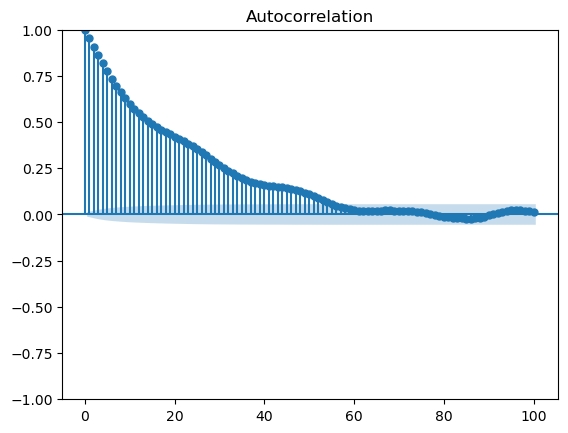

In [3]:
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=100)
plt.show()

We determine the periodicity of the time-series, i.e., the number of lags first reaches the autocorrelation nearly zero.
Here we set this period as 60.

In [4]:
predict_period = 120
num_iteration = 20
lightGBM = lightGBM_predictor(df, num_iteration, predict_period, 60, 1, 'lightgbm', 7)
pred, params = lightGBM.lightGBM_optuna()

[I 2023-02-16 00:42:44,189] A new study created in memory with name: lightgbm
[I 2023-02-16 00:43:59,390] Trial 0 finished with value: 4.520830841937131e+81 and parameters: {'n_estimators': 400, 'max_depth': 4, 'num_leaves': 40, 'min_data_in_leaf': 140, 'learning_rate': 2.66}. Best is trial 0 with value: 4.520830841937131e+81.
[I 2023-02-16 00:44:28,027] Trial 3 finished with value: 7814.506133563716 and parameters: {'n_estimators': 380, 'max_depth': 6, 'num_leaves': 940, 'min_data_in_leaf': 140, 'learning_rate': 1.81}. Best is trial 3 with value: 7814.506133563716.
[I 2023-02-16 00:44:29,170] Trial 2 finished with value: 819.8081182332419 and parameters: {'n_estimators': 370, 'max_depth': 8, 'num_leaves': 1490, 'min_data_in_leaf': 180, 'learning_rate': 1.31}. Best is trial 2 with value: 819.8081182332419.
[I 2023-02-16 00:44:30,263] Trial 4 finished with value: 2.832810235094122e+81 and parameters: {'n_estimators': 320, 'max_depth': 6, 'num_leaves': 2070, 'min_data_in_leaf': 130, 'lea

[LightGBM] [Warning] min_data_in_leaf is set=145, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=145


[I 2023-02-16 00:49:15,582] A new study created in memory with name: lightgbm
[I 2023-02-16 00:50:57,396] Trial 3 finished with value: 4.18224522634972e+18 and parameters: {'n_estimators': 120, 'max_depth': 3, 'num_leaves': 1350, 'min_data_in_leaf': 145, 'learning_rate': 2.1599999999999997}. Best is trial 3 with value: 4.18224522634972e+18.
[I 2023-02-16 00:51:35,388] Trial 5 finished with value: 1.5007274049238566e+81 and parameters: {'n_estimators': 990, 'max_depth': 3, 'num_leaves': 1890, 'min_data_in_leaf': 140, 'learning_rate': 2.21}. Best is trial 3 with value: 4.18224522634972e+18.
[I 2023-02-16 00:51:36,540] Trial 6 finished with value: 2.3770572507208026e+31 and parameters: {'n_estimators': 140, 'max_depth': 6, 'num_leaves': 1780, 'min_data_in_leaf': 180, 'learning_rate': 2.26}. Best is trial 3 with value: 4.18224522634972e+18.
[I 2023-02-16 00:51:46,877] Trial 0 finished with value: 1661.2815948106058 and parameters: {'n_estimators': 520, 'max_depth': 6, 'num_leaves': 2760, '

[LightGBM] [Warning] min_data_in_leaf is set=150, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=150


[I 2023-02-16 00:56:38,076] A new study created in memory with name: lightgbm
[I 2023-02-16 00:58:53,994] Trial 3 finished with value: 6410.465616555017 and parameters: {'n_estimators': 520, 'max_depth': 3, 'num_leaves': 300, 'min_data_in_leaf': 180, 'learning_rate': 1.1600000000000001}. Best is trial 3 with value: 6410.465616555017.
[I 2023-02-16 00:59:04,407] Trial 5 finished with value: 5739.627492620394 and parameters: {'n_estimators': 520, 'max_depth': 4, 'num_leaves': 740, 'min_data_in_leaf': 130, 'learning_rate': 0.66}. Best is trial 5 with value: 5739.627492620394.
[I 2023-02-16 00:59:25,451] Trial 4 finished with value: 5533.744668717587 and parameters: {'n_estimators': 200, 'max_depth': 7, 'num_leaves': 520, 'min_data_in_leaf': 160, 'learning_rate': 0.01}. Best is trial 4 with value: 5533.744668717587.
[I 2023-02-16 00:59:28,712] Trial 6 finished with value: 4.258955319093565e+81 and parameters: {'n_estimators': 240, 'max_depth': 9, 'num_leaves': 2540, 'min_data_in_leaf': 150

[LightGBM] [Warning] min_data_in_leaf is set=195, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=195


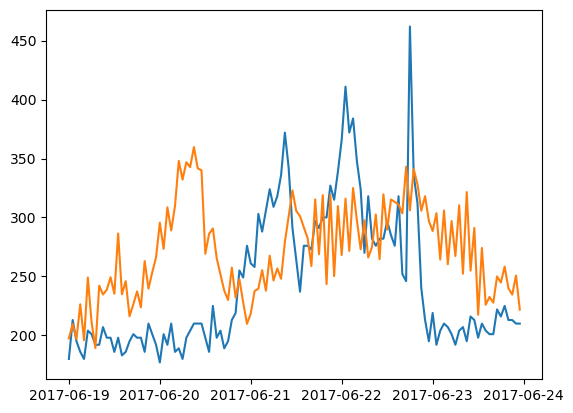

In [5]:
index = df.index[-predict_period:]
plt.plot(index, df['y'].values[-predict_period:])
plt.plot(index, pred)

In [18]:
performance_metrics = metrics_computation(df['y'][-predict_period:].values, df['y'][:-predict_period].values, pred[:,0], 'Hourly')
performance = performance_metrics.compute_metrics()
pd.DataFrame(performance, index=['SMAPE', 'MASE', 'MSE', 'MAE'], columns=['lightGBM']).T

,SMAPE,MASE,MSE,MAE
lightGBM,21.42,0.67,4563.08,55.37


<h1> Summary </h1>

This prediction method provides relatively low values of the above metrics. It may be improved by increasing the number of iterations.